# Example: Plotting Ocean Model Velocity

#### Overview
In this notebook, we will examine the structure of the ocean currents at the surface of the ocean. We will use output from the ECCO Ocean State Estimate (Version 4).

#### Import Modules
First, import the modules required to access data from netCDF files and plot it:

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

### Plotting Surface Velocities
First, we will examine the mean velocity in the ocean gyres. Since velocity is a vector, it has both an eastward and northwest component. Begin by loading in the `EVEL` and `NVEL` fields -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model.

In [2]:
# read in the EVEL and VVEL files to a xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

Next, will store our data into numpy arrays to facilitate nicer plots:

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now, we will make a simple plot of the global velocity fields:

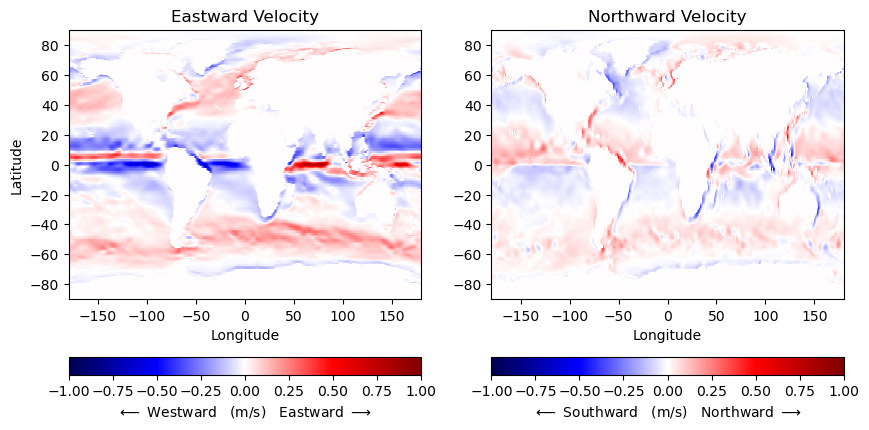

In [4]:
# make a plot of the velocity components (one for each)
# set the data bounds to +/- 1
# use a divergent colormap (such as seismic) to visualize the data

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');

### Questions:
1. What features of ocean circulation can be explained with the concept of a gyre? What specific features do you observe in the maps that support this general circulation pattern? 
2. What features of ocean circulation do you observe that CANNOT be explained with the concept of a gyre?

### Response:
1. Looking at the velocity charts, we see that we have strong westward velocity around the 20 and -20 latitude points while we have strong eastward velocity around 40 and -40 latitude points. Also, the equator goes has a strong eastward velocity. The patterns of these velocities are explained by gyres.